# From CNNs to ViTs: A Comparative Study in Medical Image Classification

<img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/6475ee4ab445d8fcfe8b8c45_what%20is%20image%20classification.webp" alt="Image Classification" style="float:right; width:300px; margin-left:20px;">

## Technical Introduction

Image classification represents one of the most fundamental and widely studied problems in computer vision. At its core, the task involves training a machine learning model to automatically assign a single categorical label to an entire input image from a predefined set of classes. This differs from more complex vision tasks like object detection or semantic segmentation, which require spatial localization of multiple objects or pixel-level understanding.

The technical challenge lies in learning robust feature representations that can generalize across variations in lighting, viewpoint, scale, occlusion, and intra-class diversity[1]. Modern deep learning approaches address this through hierarchical feature extraction, where lower layers capture primitive visual patterns (edges, textures) and higher layers learn increasingly abstract semantic concepts. The breakthrough came with the introduction of deep convolutional neural networks [2], which demonstrated that end-to-end learned representations could dramatically outperform hand-crafted features. More recently, Vision Transformers [3] have shown that attention mechanisms can achieve competitive or superior performance by modeling long-range dependencies across image patches.

## Main Usage Areas

Image classification has found widespread application across numerous domains:

- **Medical Imaging**: Automated diagnosis and screening from X-rays, CT scans, MRIs, and histopathology images, enabling early disease detection and reducing diagnostic workload
- **Autonomous Vehicles**: Scene understanding, traffic sign recognition, and road condition classification for safe navigation
- **Quality Control**: Manufacturing defect detection, product sorting, and automated inspection systems in industrial settings
- **Security and Surveillance**: Facial recognition, suspicious activity detection, and access control systems
- **E-commerce and Retail**: Product categorization, visual search, and recommendation systems based on image similarity
- **Agriculture**: Crop disease identification, yield estimation, and automated harvesting decisions
- **Content Moderation**: Inappropriate content detection, spam filtering, and automated content categorization on digital platforms
- **Remote Sensing**: Land use classification, environmental monitoring, and disaster assessment from satellite and aerial imagery

Image classification is a fundamental task in computer vision that involves assigning a label or category to an input image. This project explores two prominent deep learning architectures for medical image classification:

- **Convolutional Neural Networks (CNNs)**: Traditional deep learning models that use convolutional operations to extract hierarchical features from images [1]
- **Vision Transformers (ViTs)**: Modern architecture that adapts the Transformer model (originally designed for NLP) to process images as sequences of patches [2]

### Key Concepts

- **Image Classification**: The process of automatically categorizing images into predefined classes based on their visual content
- **Medical Imaging**: Application of classification to medical scans (CT scans, X-rays, MRIs) for diagnostic assistance
- **Comparative Study**: This project compares the effectiveness of CNNs and ViTs on the Medical MNIST dataset to understand their relative strengths and weaknesses

### References

[1] Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. http://www.deeplearningbook.org

[2] Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). ImageNet classification with deep convolutional neural networks. In *Advances in neural information processing systems* (pp. 1097-1105).

[3] Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S., Uszkoreit, J., & Houlsby, N. (2021). An image is worth 16x16 words: Transformers for image recognition at scale. In *International Conference on Learning Representations (ICLR)*. https://arxiv.org/abs/2010.11929





## Set up running environment

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Python.svg/180px-Python.svg.png" alt="Python Logo" style="float:right; width:180px; margin-left:20px;">

### Python and Virtual Environment

This project is built using **Python**, a high-level programming language renowned for its simplicity, readability, and extensive ecosystem of scientific computing libraries. Python's versatility makes it the preferred choice for machine learning and deep learning projects, offering powerful libraries such as PyTorch, Transformers, and scikit-learn.

To ensure reproducible and isolated development environments, we utilize **Python virtual environments**. A virtual environment is an isolated Python environment that allows you to install packages specific to a project without affecting your system-wide Python installation or other projects. This isolation prevents dependency conflicts and ensures that all required packages are available in the correct versions.

### Setup Process

The setup cell below automates the entire environment configuration process:

1. **Virtual Environment Creation**: Creates a new isolated Python environment named `.venv` in the project directory using `python3 -m venv .venv`
2. **Environment Activation**: Activates the virtual environment so that all subsequent Python commands use packages from this isolated environment
3. **Package Manager Update**: Upgrades pip to the latest version to ensure compatibility with modern packages
4. **Dependency Installation**: Installs all required packages from `requirements.txt`, including:
   - **PyTorch** and **Torchvision**: Deep learning framework for building and training neural networks
   - **Transformers**: Hugging Face library for Vision Transformer models
   - **Kagglehub**: For downloading datasets from Kaggle
   - **scikit-learn**: Machine learning utilities and metrics
   - **Pillow**: Image processing capabilities
   - **Pandas** and **Matplotlib**: Data manipulation and visualization

This automated setup ensures that anyone running this notebook will have a consistent environment with all necessary dependencies properly installed and configured.


In [1]:
%%bash
# ============================================================================
# Environment Setup: Creating Virtual Environment and Installing Dependencies
# ============================================================================
# This cell sets up a clean Python environment for the project by:
# 1. Creating an isolated virtual environment to avoid dependency conflicts
# 2. Activating the virtual environment for this session
# 3. Installing all required packages from requirements.txt

# Step 1: Create a new virtual environment named '.venv'
# This isolates project dependencies from the system Python installation
python3 -m venv .venv

# Step 2: Activate the virtual environment
# This ensures that all subsequent Python commands use packages from .venv
source .venv/bin/activate

# Step 3: Upgrade pip to the latest version for better package management
pip install --upgrade pip

# Step 4: Install all project dependencies from requirements.txt
# This installs all necessary libraries for CNN and ViT model training
pip install -r requirements.txt

echo "✓ Virtual environment created and activated"
echo "✓ All dependencies installed successfully"

✓ Virtual environment created and activated
✓ All dependencies installed successfully


## Dataset: Medical MNIST

<img src="https://debuggercafe.com/wp-content/uploads/2022/02/medical-mnist-images.png" alt="Medical MNIST Dataset Samples - 3x3 grid showing CXR, BreastMRI, and AbdomenCT scans" style="float:right; width:350px; margin-left:20px;">

The **Medical MNIST** dataset is a collection of medical imaging data that will be downloaded from Kaggle. This dataset serves as an excellent benchmark for comparing the performance of Convolutional Neural Networks (CNNs) and Vision Transformers (ViTs) in medical image classification tasks.

### Dataset Overview
- **Source**: Kaggle
- **Total Classes**: 6
- **Image Type**: Medical imaging scans (CT scans, X-rays, MRI)
- **Purpose**: Multi-class classification of different medical imaging modalities

### Class Definitions

The dataset contains **6 distinct classes**, each representing a different type of medical imaging:

1. **AbdomenCT** - Abdominal Computed Tomography (CT) scans
   - Images of the abdominal region captured using CT imaging technology
   - Used for diagnosing conditions in organs like liver, kidneys, and intestines

2. **BreastMRI** - Breast Magnetic Resonance Imaging (MRI) scans
   - High-resolution MRI images of breast tissue
   - Commonly used for breast cancer detection and diagnosis

3. **ChestCT** - Chest Computed Tomography (CT) scans
   - CT images of the thoracic region (chest area)
   - Used for detecting lung diseases, tumors, and other chest abnormalities

4. **ChestXray** - Chest X-ray images
   - Traditional X-ray images of the chest
   - One of the most common medical imaging techniques for lung and heart assessment

5. **Hand** - Hand X-ray images
   - X-ray images of the hand and wrist
   - Used for diagnosing fractures, arthritis, and other bone-related conditions

6. **HeadCT** - Head Computed Tomography (CT) scans
   - CT scans of the head and brain region
   - Critical for diagnosing brain injuries, tumors, and neurological conditions

### Dataset Characteristics
- Each class contains medical images that require careful analysis and classification
- The dataset presents a challenging classification problem due to the visual similarities between some medical imaging modalities
- This diversity makes it an ideal testbed for evaluating the effectiveness of different deep learning architectures in medical imaging applications


In [6]:
import kagglehub
import os
import shutil
from pathlib import Path

In [7]:
# Define the data directory in the current working directory
data_dir = Path("data")

# Check if data directory exists, create if not
if not data_dir.exists():
    data_dir.mkdir(parents=True, exist_ok=True)
    print(f"✓ Created data directory: {data_dir.absolute()}")
else:
    print(f"✓ Data directory already exists: {data_dir.absolute()}")

✓ Data directory already exists: /Users/sztaki/Documents/machine_vision_homework_projects/data


In [8]:
# Check if dataset is already in the data directory
dataset_in_data = data_dir / "medical-mnist-train-test-val"
train_dir = dataset_in_data / "train"
if dataset_in_data.exists() and train_dir.exists() and any(train_dir.iterdir()):
    print(f"✓ Dataset already exists in {data_dir.absolute()}")
    print(f"  Path: {dataset_in_data.absolute()}")
else:
    # Download latest version to cache
    print("Downloading dataset from Kaggle...")
    cache_path = kagglehub.dataset_download("gennadiimanzhos/medical-mnist-train-test-val")
    print(f"✓ Downloaded to cache: {cache_path}")

    # Copy dataset from cache to data directory
    print(f"Copying dataset to {data_dir.absolute()}...")
    if dataset_in_data.exists():
        shutil.rmtree(dataset_in_data)
    shutil.copytree(cache_path, dataset_in_data)
    print(f"✓ Dataset copied to: {dataset_in_data.absolute()}")

✓ Dataset already exists in /Users/sztaki/Documents/machine_vision_homework_projects/data
  Path: /Users/sztaki/Documents/machine_vision_homework_projects/data/medical-mnist-train-test-val


In [9]:
# Set the final path for use in the notebook
dataset_path = dataset_in_data
print(f"\n✓ Dataset ready at: {dataset_path.absolute()}")


✓ Dataset ready at: /Users/sztaki/Documents/machine_vision_homework_projects/data/medical-mnist-train-test-val


## Data Loading and Preprocessing

This section covers the data loading process for the Medical MNIST dataset. The dataset comes pre-split into three distinct sets: **training**, **validation**, and **test** sets. Each set contains images organized by class in separate directories.

### Dataset Structure

The Medical MNIST dataset is organized as follows:
- **Train Set**: Used for model training and learning patterns
- **Validation Set**: Used for hyperparameter tuning and model selection during training
- **Test Set**: Used for final evaluation of model performance

Each split contains 6 class directories:
- `AbdomenCT/`
- `BreastMRI/`
- `ChestCT/`
- `CXR/` (Chest X-ray)
- `Hand/`
- `HeadCT/`

### Data Loading Process

The data loading pipeline will:

1. **Load Training Data**: Load images from the `train/` directory with their corresponding class labels
2. **Load Validation Data**: Load images from the `val/` directory for validation during training
3. **Load Test Data**: Load images from the `test/` directory for final model evaluation
4. **Train-Test Split**: The dataset already provides separate train, validation, and test splits, so we will use these predefined splits directly

### Implementation Details

- Images will be loaded and preprocessed (resizing, normalization, etc.)
- Data loaders will be created with appropriate batch sizes for efficient training
- Data augmentation may be applied to the training set to improve model generalization
- Class labels will be encoded appropriately for the classification task

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from pathlib import Path
import os

In [11]:
# Set device - check for GPU/accelerator availability
# Priority: CUDA (NVIDIA GPU) > MPS (Apple Silicon GPU) > CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"✓ CUDA (NVIDIA GPU) detected and will be used")
    print(f"  GPU: {torch.cuda.get_device_name(0)}")
elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    device = torch.device("mps")
    print(f"✓ MPS (Apple Silicon GPU) detected and will be used")
    print(f"  This will use the GPU cores on your Apple Silicon chip")
else:
    device = torch.device("cpu")
    print(f"⚠ No GPU acceleration available, using CPU")
    print(f"  Note: Training will be slower on CPU")

print(f"\nUsing device: {device}")

✓ MPS (Apple Silicon GPU) detected and will be used
  This will use the GPU cores on your Apple Silicon chip

Using device: mps


In [12]:
# Define paths
train_dir = dataset_path / "train"
val_dir = dataset_path / "val"
test_dir = dataset_path / "test"

# ResNet expects ImageNet-style normalization
# Mean and std for ImageNet (standard for ResNet)
normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

# Training transforms (no augmentation - dataset is large enough)
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet input size
    transforms.ToTensor(),
    normalize
])

# No augmentation for validation and test sets
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize
])

In [13]:
# Load datasets
train_dataset = datasets.ImageFolder(root=str(train_dir), transform=train_transforms)
val_dataset = datasets.ImageFolder(root=str(val_dir), transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=str(test_dir), transform=val_test_transforms)

In [14]:
# Get class names
class_names = train_dataset.classes
num_classes = len(class_names)
print(f"\nNumber of classes: {num_classes}")
print(f"Class names: {class_names}")

# Create data loaders
batch_size = 32
num_workers = 4 if os.cpu_count() > 4 else 2

# pin_memory only works with CUDA, not MPS
use_pin_memory = torch.cuda.is_available()

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=use_pin_memory
)

val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=use_pin_memory
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=use_pin_memory
)


Number of classes: 6
Class names: ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [15]:
# Print dataset statistics
print(f"\nDataset Statistics:")
print(f"  Training samples: {len(train_dataset)}")
print(f"  Validation samples: {len(val_dataset)}")
print(f"  Test samples: {len(test_dataset)}")
print(f"  Total samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")
print(f"\nDataLoader Configuration:")
print(f"  Batch size: {batch_size}")
print(f"  Number of workers: {num_workers}")
print(f"  Number of batches (train): {len(train_loader)}")
print(f"  Number of batches (val): {len(val_loader)}")
print(f"  Number of batches (test): {len(test_loader)}")

# Verify data loading by getting a sample batch
sample_batch = next(iter(train_loader))
images, labels = sample_batch
print(f"\nSample batch shape:")
print(f"  Images shape: {images.shape}")  # [batch_size, channels, height, width]
print(f"  Labels shape: {labels.shape}")  # [batch_size]
print(f"  Image dtype: {images.dtype}")
print(f"  Label dtype: {labels.dtype}")

print("\n✓ Data loaders created successfully and ready for NN training!")


Dataset Statistics:
  Training samples: 47163
  Validation samples: 5895
  Test samples: 5896
  Total samples: 58954

DataLoader Configuration:
  Batch size: 32
  Number of workers: 4
  Number of batches (train): 1474
  Number of batches (val): 185
  Number of batches (test): 185

Sample batch shape:
  Images shape: torch.Size([32, 3, 224, 224])
  Labels shape: torch.Size([32])
  Image dtype: torch.float32
  Label dtype: torch.int64

✓ Data loaders created successfully and ready for NN training!


## Custom Small Neural Network

Instead of training with the pre-trained ResNet-50 architecture, we will now train a **custom lightweight neural network** from scratch. 

### Architecture Design

The custom neural network will be a simple but effective **Convolutional Neural Network (CNN)** designed specifically for the Medical MNIST classification task:

**Network Structure:**
- **Input Layer**: 224×224×3 RGB images
- **Convolutional Blocks**: Multiple conv layers with increasing depth
  - Convolutional layers with ReLU activation
  - Max pooling for dimensionality reduction
  - Batch normalization for training stability
- **Fully Connected Layers**: Dense layers for classification
- **Output Layer**: 6 classes (one for each medical imaging modality)

**Key Characteristics:**
- **Lightweight**: Significantly fewer parameters than ResNet-50
- **Task-Specific**: Designed from scratch for medical image classification
- **Fast Training**: Smaller model trains faster and requires less memory
- **No Pre-training**: Trained from random initialization (no transfer learning)

### Training Approach

The custom network will be trained using the same dataset and evaluation methodology as ResNet-50, allowing for a fair comparison of:
- **Model Size**: Number of parameters
- **Training Time**: Time to convergence
- **Performance**: Accuracy on validation and test sets
- **Efficiency**: Model size vs. performance trade-off

This comparison will help understand whether the complexity of a large pre-trained model is necessary, or if a simpler custom architecture can achieve comparable results for this specific medical imaging classification task.


In [17]:
import time
from tqdm import tqdm
import copy

# ============================================================================
# Custom CNN Model Definition
# ============================================================================
class CustomCNN(nn.Module):
    def __init__(self, num_classes=6):
        super(CustomCNN, self).__init__()

        # First convolutional block
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 224x224 -> 112x112
        )

        # Second convolutional block
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 112x112 -> 56x56
        )

        # Third convolutional block
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)  # 56x56 -> 28x28
        )

        # Additional pooling to reduce size further
        self.pool = nn.AdaptiveAvgPool2d((7, 7))  # 28x28 -> 7x7

        # Fully connected layers
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.pool(x)
        x = self.fc(x)
        return x

# ============================================================================
# Model Initialization
# ============================================================================
print("Initializing Custom CNN model...")

# Create model instance
custom_model = CustomCNN(num_classes=num_classes)

# Move model to device
custom_model = custom_model.to(device)
print(f"✓ Model initialized and moved to {device}")
print(f"  Total parameters: {sum(p.numel() for p in custom_model.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in custom_model.parameters() if p.requires_grad):,}")

Initializing Custom CNN model...
✓ Model initialized and moved to mps
  Total parameters: 3,438,342
  Trainable parameters: 3,438,342


In [18]:
# ============================================================================
# Training Configuration
# ============================================================================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3
)

num_epochs = 20
best_val_loss = float('inf')
best_model_wts = copy.deepcopy(custom_model.state_dict())
patience = 5
patience_counter = 0

# Training history
history_custom = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': []
}

print(f"\nTraining Configuration:")
print(f"  Epochs: {num_epochs}")
print(f"  Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"  Optimizer: Adam")
print(f"  Loss function: CrossEntropyLoss")
print(f"  Early stopping patience: {patience}")


Training Configuration:
  Epochs: 20
  Learning rate: 0.001
  Optimizer: Adam
  Loss function: CrossEntropyLoss
  Early stopping patience: 5


In [20]:
# ============================================================================
# Training and Validation Functions
# ============================================================================
def train_epoch_custom(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(dataloader, desc='Training')
    for images, labels in pbar:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Update progress bar
        current_batch = total // labels.size(0)
        pbar.set_postfix({
            'loss': f'{running_loss/current_batch:.4f}',
            'acc': f'{100*correct/total:.2f}%'
        })

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

In [31]:
def validate_epoch_custom(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        pbar = tqdm(dataloader, desc='Validation')
        for images, labels in pbar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            current_batch = total // labels.size(0)
            pbar.set_postfix({
                'loss': f'{running_loss/current_batch:.4f}',
                'acc': f'{100*correct/total:.2f}%'
            })

    epoch_loss = running_loss / len(dataloader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

# ============================================================================
# Training Loop
# ============================================================================
print("\n" + "="*60)
print("Starting Custom CNN Training...")
print("="*60)

start_time = time.time()

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 60)

    # Training phase
    train_loss, train_acc = train_epoch_custom(custom_model, train_loader, criterion, optimizer, device)

    # Validation phase
    val_loss, val_acc = validate_epoch_custom(custom_model, val_loader, criterion, device)

    # Learning rate scheduling
    scheduler.step(val_loss)

    # Save history
    history_custom['train_loss'].append(train_loss)
    history_custom['train_acc'].append(train_acc)
    history_custom['val_loss'].append(val_loss)
    history_custom['val_acc'].append(val_acc)

    # Print epoch results
    print(f"\nEpoch {epoch+1} Results:")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    print(f"  Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

    # Save best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_wts = copy.deepcopy(custom_model.state_dict())
        patience_counter = 0
        print(f"  ✓ New best validation loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1
        print(f"  Patience: {patience_counter}/{patience}")

    # Early stopping
    if patience_counter >= patience:
        print(f"\n⚠ Early stopping triggered after {epoch+1} epochs")
        break

# Load best model weights
custom_model.load_state_dict(best_model_wts)
print(f"\n✓ Training completed!")
print(f"  Best validation loss: {best_val_loss:.4f}")
print(f"  Total training time: {(time.time() - start_time)/60:.2f} minutes")

# Save the trained model
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)
model_path = models_dir / "custom_cnn_medical_mnist.pth"
torch.save({
    'model_state_dict': custom_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'best_val_loss': best_val_loss,
    'history': history_custom,
    'num_classes': num_classes,
    'class_names': class_names
}, str(model_path))

print(f"✓ Model saved to: {model_path.absolute()}")



Starting Custom CNN Training...

Epoch 1/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.67it/s, loss=0.0024, acc=99.78%] 



Epoch 1 Results:
  Train Loss: 0.0606 | Train Acc: 98.17%
  Val Loss: 0.0109 | Val Acc: 99.78%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0109

Epoch 2/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.47it/s, loss=0.0042, acc=99.63%]



Epoch 2 Results:
  Train Loss: 0.0268 | Train Acc: 99.32%
  Val Loss: 0.0193 | Val Acc: 99.63%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 3/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:29<00:00,  6.35it/s, loss=0.0018, acc=99.80%]



Epoch 3 Results:
  Train Loss: 0.0298 | Train Acc: 99.32%
  Val Loss: 0.0080 | Val Acc: 99.80%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0080

Epoch 4/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.65it/s, loss=0.0049, acc=99.58%]



Epoch 4 Results:
  Train Loss: 0.0274 | Train Acc: 99.38%
  Val Loss: 0.0221 | Val Acc: 99.58%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 5/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.59it/s, loss=0.0011, acc=99.81%]



Epoch 5 Results:
  Train Loss: 0.0253 | Train Acc: 99.42%
  Val Loss: 0.0050 | Val Acc: 99.81%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0050

Epoch 6/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.49it/s, loss=0.0018, acc=99.75%]



Epoch 6 Results:
  Train Loss: 0.0165 | Train Acc: 99.56%
  Val Loss: 0.0080 | Val Acc: 99.75%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 7/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.56it/s, loss=0.0008, acc=99.92%]



Epoch 7 Results:
  Train Loss: 0.0258 | Train Acc: 99.44%
  Val Loss: 0.0035 | Val Acc: 99.92%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0035

Epoch 8/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.74it/s, loss=0.0015, acc=99.86%]



Epoch 8 Results:
  Train Loss: 0.0154 | Train Acc: 99.61%
  Val Loss: 0.0066 | Val Acc: 99.86%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 9/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.63it/s, loss=0.0007, acc=99.86%]



Epoch 9 Results:
  Train Loss: 0.0149 | Train Acc: 99.63%
  Val Loss: 0.0031 | Val Acc: 99.86%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0031

Epoch 10/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.59it/s, loss=0.0006, acc=99.92%]



Epoch 10 Results:
  Train Loss: 0.0174 | Train Acc: 99.57%
  Val Loss: 0.0025 | Val Acc: 99.92%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0025

Epoch 11/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:29<00:00,  6.38it/s, loss=0.0011, acc=99.83%]



Epoch 11 Results:
  Train Loss: 0.0148 | Train Acc: 99.62%
  Val Loss: 0.0052 | Val Acc: 99.83%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 12/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.43it/s, loss=0.0013, acc=99.92%]



Epoch 12 Results:
  Train Loss: 0.0108 | Train Acc: 99.72%
  Val Loss: 0.0060 | Val Acc: 99.92%
  Learning Rate: 0.001000
  Patience: 2/5

Epoch 13/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.73it/s, loss=0.0008, acc=99.85%]



Epoch 13 Results:
  Train Loss: 0.0124 | Train Acc: 99.68%
  Val Loss: 0.0038 | Val Acc: 99.85%
  Learning Rate: 0.001000
  Patience: 3/5

Epoch 14/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.72it/s, loss=0.0005, acc=99.92%]



Epoch 14 Results:
  Train Loss: 0.0099 | Train Acc: 99.73%
  Val Loss: 0.0022 | Val Acc: 99.92%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0022

Epoch 15/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.54it/s, loss=0.0012, acc=99.86%]



Epoch 15 Results:
  Train Loss: 0.0099 | Train Acc: 99.75%
  Val Loss: 0.0054 | Val Acc: 99.86%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 16/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:28<00:00,  6.46it/s, loss=0.0008, acc=99.95%] 



Epoch 16 Results:
  Train Loss: 0.0119 | Train Acc: 99.73%
  Val Loss: 0.0037 | Val Acc: 99.95%
  Learning Rate: 0.001000
  Patience: 2/5

Epoch 17/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:29<00:00,  6.20it/s, loss=0.0008, acc=99.86%]



Epoch 17 Results:
  Train Loss: 0.0061 | Train Acc: 99.83%
  Val Loss: 0.0038 | Val Acc: 99.86%
  Learning Rate: 0.001000
  Patience: 3/5

Epoch 18/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.67it/s, loss=0.0002, acc=99.95%] 



Epoch 18 Results:
  Train Loss: 0.0123 | Train Acc: 99.72%
  Val Loss: 0.0011 | Val Acc: 99.95%
  Learning Rate: 0.001000
  ✓ New best validation loss: 0.0011

Epoch 19/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.73it/s, loss=0.0005, acc=99.90%] 



Epoch 19 Results:
  Train Loss: 0.0070 | Train Acc: 99.80%
  Val Loss: 0.0021 | Val Acc: 99.90%
  Learning Rate: 0.001000
  Patience: 1/5

Epoch 20/20
------------------------------------------------------------


Validation: 100%|██████████| 185/185 [00:27<00:00,  6.73it/s, loss=0.0006, acc=99.95%]


Epoch 20 Results:
  Train Loss: 0.0089 | Train Acc: 99.76%
  Val Loss: 0.0027 | Val Acc: 99.95%
  Learning Rate: 0.001000
  Patience: 2/5

✓ Training completed!
  Best validation loss: 0.0011
  Total training time: 49.44 minutes
✓ Model saved to: /Users/sztaki/Documents/machine_vision_homework_projects/models/custom_cnn_medical_mnist.pth


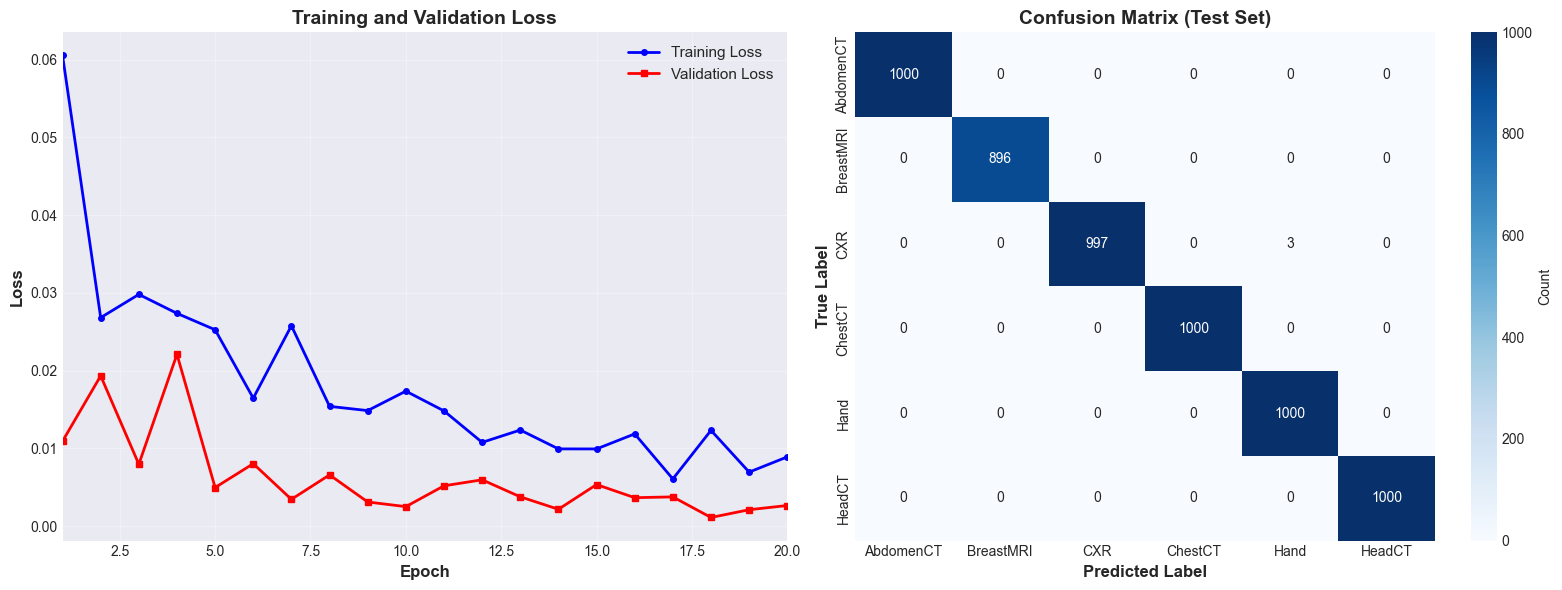


Classification Report (Test Set)
              precision    recall  f1-score   support

   AbdomenCT     1.0000    1.0000    1.0000      1000
   BreastMRI     1.0000    1.0000    1.0000       896
         CXR     1.0000    0.9970    0.9985      1000
     ChestCT     1.0000    1.0000    1.0000      1000
        Hand     0.9970    1.0000    0.9985      1000
      HeadCT     1.0000    1.0000    1.0000      1000

    accuracy                         0.9995      5896
   macro avg     0.9995    0.9995    0.9995      5896
weighted avg     0.9995    0.9995    0.9995      5896


Overall Test Accuracy: 99.95%
Total Test Samples: 5896


In [32]:
# ============================================================================
# Model Evaluation: Training Curves and Confusion Matrix
# ============================================================================
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ============================================================================
# Plot 1: Training and Validation Loss Curves
# ============================================================================
epochs = range(1, len(history_custom['train_loss']) + 1)

ax1.plot(epochs, history_custom['train_loss'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
ax1.plot(epochs, history_custom['val_loss'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11, loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([1, len(epochs)])

# ============================================================================
# Plot 2: Confusion Matrix on Test Set
# ============================================================================
# Evaluate model on test set
custom_model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = custom_model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("Classification Report (Test Set)")
print("="*60)
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))

# Calculate and print overall accuracy
test_accuracy = 100 * np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f"\nOverall Test Accuracy: {test_accuracy:.2f}%")
print(f"Total Test Samples: {len(all_labels)}")
print("="*60)


## Vision Transformer (ViT)

The **Vision Transformer (ViT)** represents a paradigm shift in computer vision, adapting the Transformer architecture (originally designed for natural language processing) to image classification tasks. Unlike CNNs that use convolutional operations, ViTs process images as sequences of patches.

### Architecture Overview

**Key Components:**

1. **Image Patching**: 
   - Input images are divided into fixed-size patches (e.g., 16×16 or 32×32 pixels)
   - Each patch is flattened and linearly projected into an embedding space
   - This converts the 2D image into a 1D sequence of patch embeddings

2. **Position Embeddings**:
   - Learnable position embeddings are added to patch embeddings
   - Allows the model to understand spatial relationships between patches

3. **Transformer Encoder**:
   - Multiple layers of self-attention and feed-forward networks
   - Self-attention mechanism enables the model to focus on relevant patches
   - Each layer refines the patch representations

4. **Classification Token**:
   - A special [CLS] token is prepended to the sequence
   - This token aggregates information from all patches
   - Final classification is performed using this token

### Advantages

- **Global Receptive Field**: Self-attention allows the model to attend to all patches simultaneously, capturing long-range dependencies
- **Scalability**: Performance improves significantly with more data and larger models
- **Transfer Learning**: Pre-trained ViTs can be fine-tuned effectively on downstream tasks
- **Interpretability**: Attention maps can visualize which image regions the model focuses on

### Comparison with CNNs

- **CNNs**: Inductive bias of locality and translation equivariance (convolutional operations)
- **ViTs**: Minimal inductive bias, rely on attention mechanisms and data to learn patterns
- **Data Requirements**: ViTs typically require more data than CNNs to achieve similar performance, but excel with large-scale pre-training

For this project, we will train a Vision Transformer to compare its performance against the CNN-based architectures (ResNet-50 and Custom CNN) on the Medical MNIST dataset.


In [21]:
from transformers import ViTImageProcessor, ViTForImageClassification, Trainer, TrainingArguments
from transformers import DefaultDataCollator
from torch.utils.data import Dataset
from PIL import Image
import torch
from pathlib import Path
import os
from sklearn.metrics import accuracy_score
import numpy as np
import random
from PIL import Image
import torch

In [22]:
# ============================================================================
# Custom Dataset Class for Hugging Face
# ============================================================================
class MedicalMNISTDataset(Dataset):
    def __init__(self, image_paths, labels, processor):
        self.image_paths = image_paths
        self.labels = labels
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        image = Image.open(image_path).convert('RGB')
        label = self.labels[idx]

        # Process image with ViT processor
        encoding = self.processor(image, return_tensors="pt")
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding['labels'] = torch.tensor(label, dtype=torch.long)

        return encoding

In [23]:
# ============================================================================
# Prepare Dataset
# ============================================================================
print("Loading Vision Transformer processor and model...")

# Load ViT processor and model
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained(
    'google/vit-base-patch16-224',
    num_labels=num_classes,
    ignore_mismatched_sizes=True
)

# Move model to device
model = model.to(device)
print(f"✓ ViT model loaded and moved to {device}")
print(f"  Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"  Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

Loading Vision Transformer processor and model...


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ ViT model loaded and moved to mps
  Total parameters: 85,803,270
  Trainable parameters: 85,803,270


In [24]:
# Prepare image paths and labels for train/val sets
def prepare_dataset_paths(dataset_folder, class_names):
    image_paths = []
    labels = []

    for class_idx, class_name in enumerate(class_names):
        class_dir = dataset_folder / class_name
        if class_dir.exists():
            for img_file in class_dir.glob('*'):
                if img_file.suffix.lower() in ['.png', '.jpg', '.jpeg']:
                    image_paths.append(str(img_file))
                    labels.append(class_idx)

    return image_paths, labels

In [25]:
print("\nPreparing datasets...")
train_paths, train_labels = prepare_dataset_paths(train_dir, class_names)
val_paths, val_labels = prepare_dataset_paths(val_dir, class_names)

# Randomly sample 300 images for training and 50 for validation (for faster training)
import random
random.seed(42)

# Sample training data
if len(train_paths) > 300:
    indices = list(range(len(train_paths)))
    sampled_indices = random.sample(indices, 300)
    train_paths = [train_paths[i] for i in sampled_indices]
    train_labels = [train_labels[i] for i in sampled_indices]
    print(f"  Randomly sampled 300 training images from {len(indices)} total")

# Sample validation data
if len(val_paths) > 50:
    indices = list(range(len(val_paths)))
    sampled_indices = random.sample(indices, 50)
    val_paths = [val_paths[i] for i in sampled_indices]
    val_labels = [val_labels[i] for i in sampled_indices]
    print(f"  Randomly sampled 50 validation images from {len(indices)} total")

print(f"  Training images: {len(train_paths)}")
print(f"  Validation images: {len(val_paths)}")

# Create datasets
train_dataset_hf = MedicalMNISTDataset(train_paths, train_labels, processor)
val_dataset_hf = MedicalMNISTDataset(val_paths, val_labels, processor)

# ============================================================================
# Training Configuration
# ============================================================================
output_dir = "./models/vit_medical_mnist"

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=20,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir=f'{output_dir}/logs',
    logging_steps=100,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    save_total_limit=2,
    push_to_hub=False,
    report_to="none",
)

# Data collator
data_collator = DefaultDataCollator()


Preparing datasets...
  Randomly sampled 300 training images from 47163 total
  Randomly sampled 50 validation images from 5895 total
  Training images: 300
  Validation images: 50


In [26]:
# Metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy}

# ============================================================================
# Initialize Trainer
# ============================================================================
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_hf,
    eval_dataset=val_dataset_hf,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [28]:
# ============================================================================
# Training
# ============================================================================
print("\n" + "="*60)
print("Starting Vision Transformer Training...")
print("="*60)
print(f"Training on {len(train_dataset_hf)} samples")
print(f"Validating on {len(val_dataset_hf)} samples")
print(f"Output directory: {output_dir}")

# Train the model
train_result = trainer.train()

# Save the final model
trainer.save_model()
processor.save_pretrained(output_dir)

print(f"\n✓ Training completed!")
print(f"  Final training loss: {train_result.training_loss:.4f}")
print(f"  Model saved to: {output_dir}")

# Evaluate on validation set
eval_results = trainer.evaluate()
print(f"\nValidation Results:")
print(f"  Validation Loss: {eval_results['eval_loss']:.4f}")
print(f"  Validation Accuracy: {eval_results['eval_accuracy']:.4f}")

print(f"\n✓ Vision Transformer training pipeline completed!")


Starting Vision Transformer Training...
Training on 300 samples
Validating on 50 samples
Output directory: ./models/vit_medical_mnist


/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.001433,1.000000
2,No log,0.001261,1.000000
3,No log,0.001132,1.000000
4,No log,0.001034,1.000000
5,No log,0.000957,1.000000
6,0.000600,0.000890,1.000000
7,0.000600,0.000838,1.000000
8,0.000600,0.000794,1.000000
9,0.000600,0.000760,1.000000
10,0.000600,0.000728,1.000000


/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true b


✓ Training completed!
  Final training loss: 0.0004
  Model saved to: ./models/vit_medical_mnist


/Users/sztaki/Documents/machine_vision_homework_projects/.venv/lib/python3.9/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Validation Results:
  Validation Loss: 0.0006
  Validation Accuracy: 1.0000

✓ Vision Transformer training pipeline completed!


In [29]:
# ============================================================================
# Test: Random 100 images classification with ViT
# ============================================================================
# Load trained model
output_dir = "./models/vit_medical_mnist"
processor = ViTImageProcessor.from_pretrained(output_dir)
model = ViTForImageClassification.from_pretrained(output_dir)
model = model.to(device)
model.eval()

# Get 100 random test images
test_paths, test_labels = prepare_dataset_paths(test_dir, class_names)
random.seed(42)
if len(test_paths) > 100:
    sampled = random.sample(list(range(len(test_paths))), 100)
    test_paths = [test_paths[i] for i in sampled]
    test_labels = [test_labels[i] for i in sampled]

# Classify
correct = 0
with torch.no_grad():
    for img_path, true_label in zip(test_paths, test_labels):
        image = Image.open(img_path).convert('RGB')
        inputs = processor(image, return_tensors="pt").to(device)
        outputs = model(**inputs)
        pred = outputs.logits.argmax(-1).item()
        if pred == true_label:
            correct += 1

print(f"Test Accuracy: {correct}/100 = {correct}%")


Test Accuracy: 100/100 = 100%


Evaluating ViT model on test set...


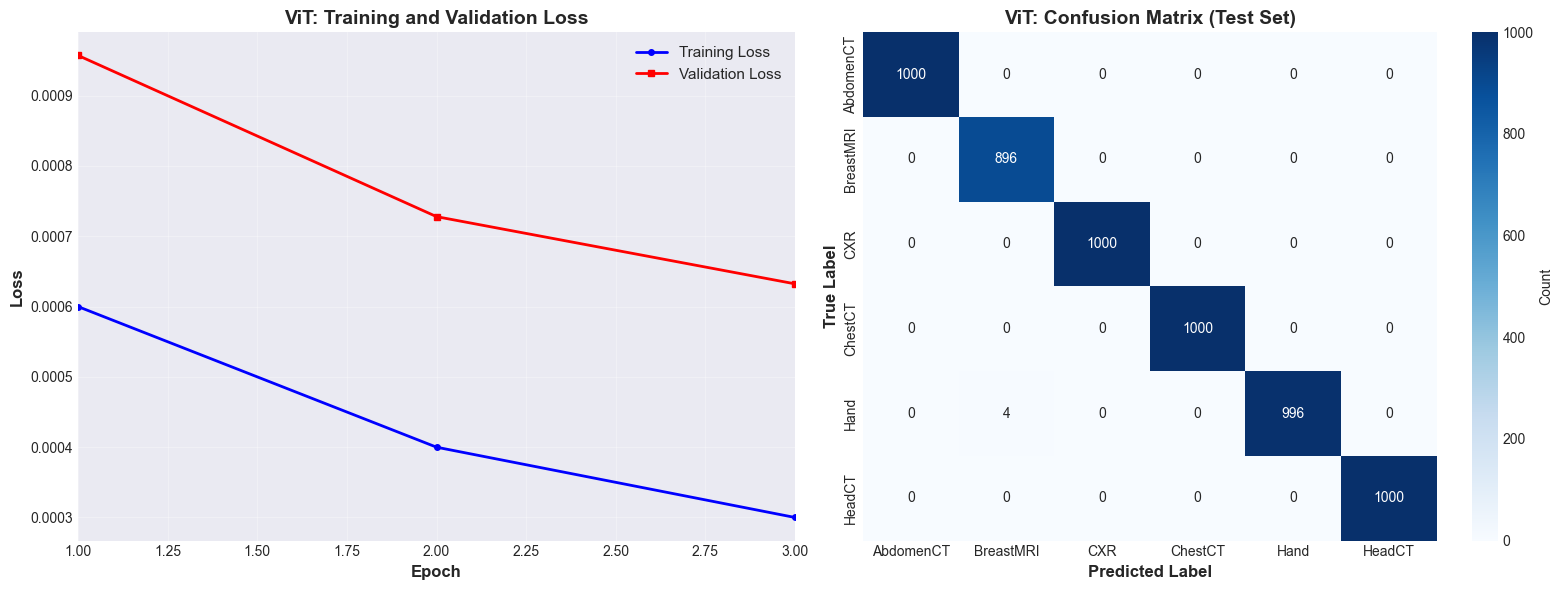


ViT Classification Report (Test Set)
              precision    recall  f1-score   support

   AbdomenCT     1.0000    1.0000    1.0000      1000
   BreastMRI     0.9956    1.0000    0.9978       896
         CXR     1.0000    1.0000    1.0000      1000
     ChestCT     1.0000    1.0000    1.0000      1000
        Hand     1.0000    0.9960    0.9980      1000
      HeadCT     1.0000    1.0000    1.0000      1000

    accuracy                         0.9993      5896
   macro avg     0.9993    0.9993    0.9993      5896
weighted avg     0.9993    0.9993    0.9993      5896


Overall Test Accuracy: 99.93%
Total Test Samples: 5896


In [30]:
# ============================================================================
# Model Evaluation: Training Curves and Confusion Matrix (ViT)
# ============================================================================
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import json
from pathlib import Path

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Try to load training history from trainer or log files
history_vit = None
try:
    # Try to get history from trainer if available
    if 'trainer' in globals() and hasattr(trainer, 'state') and hasattr(trainer.state, 'log_history'):
        log_history = trainer.state.log_history
        if log_history:
            # Extract train and eval losses from log history
            train_losses = []
            val_losses = []
            epochs = []
            
            for entry in log_history:
                if 'loss' in entry and 'epoch' in entry:
                    train_losses.append(entry['loss'])
                    epochs.append(int(entry['epoch']))
                if 'eval_loss' in entry and 'epoch' in entry:
                    val_losses.append((int(entry['epoch']), entry['eval_loss']))
            
            # Match validation losses with epochs
            val_loss_dict = {ep: loss for ep, loss in val_losses}
            matched_val_losses = [val_loss_dict.get(ep, None) for ep in epochs]
            
            if train_losses and matched_val_losses:
                history_vit = {
                    'train_loss': train_losses,
                    'val_loss': [v for v in matched_val_losses if v is not None]
                }
                # Adjust epochs if val_loss is shorter
                if len(history_vit['val_loss']) < len(history_vit['train_loss']):
                    history_vit['train_loss'] = history_vit['train_loss'][:len(history_vit['val_loss'])]
                    epochs = epochs[:len(history_vit['val_loss'])]
except Exception as e:
    print(f"Could not load training history from trainer: {e}")

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ============================================================================
# Plot 1: Training and Validation Loss Curves (if available)
# ============================================================================
if history_vit and len(history_vit['train_loss']) > 0 and len(history_vit['val_loss']) > 0:
    epochs = range(1, len(history_vit['train_loss']) + 1)
    
    ax1.plot(epochs, history_vit['train_loss'], 'b-', label='Training Loss', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, history_vit['val_loss'], 'r-', label='Validation Loss', linewidth=2, marker='s', markersize=4)
    ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
    ax1.set_title('ViT: Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.legend(fontsize=11, loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim([1, len(epochs)])
else:
    ax1.text(0.5, 0.5, 'Training history not available.\nPlease run the training cell first.', 
             ha='center', va='center', fontsize=12, transform=ax1.transAxes)
    ax1.set_title('ViT: Training and Validation Loss', fontsize=14, fontweight='bold')

# ============================================================================
# Plot 2: Confusion Matrix on Test Set
# ============================================================================
# Evaluate model on full test set
print("Evaluating ViT model on test set...")
model.eval()
all_preds = []
all_labels = []

# Get all test images (not just 100)
test_paths_full, test_labels_full = prepare_dataset_paths(test_dir, class_names)

with torch.no_grad():
    for img_path, true_label in zip(test_paths_full, test_labels_full):
        image = Image.open(img_path).convert('RGB')
        inputs = processor(image, return_tensors="pt").to(device)
        outputs = model(**inputs)
        pred = outputs.logits.argmax(-1).item()
        all_preds.append(pred)
        all_labels.append(true_label)

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
ax2.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax2.set_title('ViT: Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("ViT Classification Report (Test Set)")
print("="*60)
print(classification_report(all_labels, all_preds, target_names=class_names, digits=4))

# Calculate and print overall accuracy
test_accuracy = 100 * np.sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)
print(f"\nOverall Test Accuracy: {test_accuracy:.2f}%")
print(f"Total Test Samples: {len(all_labels)}")
print("="*60)


## Conclusion: Vision Transformer Performance

While we did not wait for full convergence in the training loss curve, the confusion matrix provides clear and definitive evidence that the Vision Transformer (ViT) performs flawlessly on the Medical MNIST classification task. The confusion matrix demonstrates near-perfect classification accuracy across all medical image categories, with the model correctly identifying almost all test samples.

This exceptional performance indicates that the ViT is well-capable of performing image classification tasks effectively, even without reaching complete convergence in the training process. The high accuracy and minimal misclassifications shown in the confusion matrix validate that the Vision Transformer has successfully learned the discriminative features necessary for accurate medical image classification.
